# Génération et visualisation des profils de charge
---
### Étape 1 – Préparation et visualisation des données de charge  

Les données horaires issues du PPSELD ont été organisées afin de représenter les profils de charge de trois feeders (industriel et résidentiels) ainsi que la charge totale.  

Quatre journées de référence ont été retenues : **deux en semaine (2019 et 2025)** et **deux en week-end (2019 et 2025)**.  
- Les profils **de semaine** sont tracés en **ligne continue**.  
- Les profils **de week-end** apparaissent en **pointillés**.  

Ces courbes permettent de comparer :  
- l’évolution entre 2019 et 2025,  
- la différence entre jours ouvrables et week-ends,  
- ainsi que la répartition de la consommation entre industrie et résidentiel.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from labellines import labelLines
import math

In [2]:
feeders = "feeders"
feeder_type =  ["Feeder 1 - PIC", "Feeder 2 - Res1", "Feeder 3 - Res2", "Total Generation"]
hour = "Hour"
col_dict = dict()
sheet_name_dict = {
    0:"07/28/2019",
    1:"07/23/2019",
    2:"01/26/2025",
    3:"01/22/2025"
}
nb_feeder = 3
needed_indexes = [3, 4, 6, 8, 10]
path = './Data/PowerPlantLoadProfilesFM.xlsx'
def set_df(sheet_index):
    if sheet_index < 4:
        df = pd.read_excel(path, sheet_name=sheet_index)
        df = df.iloc[needed_indexes]
        df.columns = df.iloc[0]
        df = df.reset_index(drop=True)
        df = df.dropna(axis=1)
        df.drop(index=0, inplace=True)
        df.rename(columns={
            df.columns[0]:feeders, 
        }, inplace=True)

        df[feeders] = feeder_type
        df.set_index(feeders, inplace=True)
        [col_dict.update({col:f"{col.time().hour}:00"}) for col in df.columns]
        df.rename(columns=col_dict, inplace=True)  
        df.columns.name = hour

        return df

def daily_plot_by_feeder(df, day):
    print(day)
    # Create wider plot
    plt.figure(figsize=(12, 6))
    
    for feeder in df.index:

        if feeder != feeder_type[-1] :
            plt.plot(
                df.loc[feeder], 
                label=str(feeder),
                linewidth = 5 if feeder == feeder_type[0] else 2 ,
                linestyle = "--" if day in [sheet_name_dict[0],sheet_name_dict[2]]   else "-"
            )
    
    # Add labels, title and legend
    plt.xlabel("Heure", fontsize=12)
    plt.ylabel("Consommation (kW)", fontsize=12)
    plt.title(f"Profils de Consommation par Feeder - {day}", fontsize=14)
    plt.legend(title="Feeder")
    plt.grid(True)
    plt.tight_layout()
    # Show plot
    #plt.show()
    xvals = ["14:00", "14:00", "18:00"]
    lines = plt.gca().get_lines()
    labelLines(lines, xvals=xvals, align=True)
    return


def set_df_for_total_generation(sheet_index):
    
    needed_indexes_ = [3, 10]
    day_index = "Jours"
    if sheet_index < 4:
        df = pd.read_excel(path, sheet_name=sheet_index)
        df = df.iloc[needed_indexes_]
        df.columns = df.iloc[0]
        df = df.reset_index(drop=True)
        df = df.dropna(axis=1)
        df.drop(index=0, inplace=True)
        df.rename(columns={
            df.columns[0]:day_index,
            
        }, inplace=True)
        
        df.set_index(day_index, inplace=True)
        [col_dict.update({col:f"{col.time().hour}:00"}) for col in df.columns]
        df.rename(columns=col_dict, inplace=True)
        df.rename(index={"kW":sheet_name_dict[sheet_index]}, inplace=True)
        return df

def daily_plot_by_total_generation(df):
        
        # Create wider plot
        plt.figure(figsize=(12, 6))
        
        # Plot each day's profile (assuming each index is a day)
        for index in df.index:
            plt.plot(df.columns, df.loc[index], label=str(index), 
                     linestyle = "--" if index in [sheet_name_dict[0],sheet_name_dict[2]] else "-",
                     
                    )
            
        # Add labels, title and legend
        plt.xlabel("Heure", fontsize=12)
        plt.ylabel("Consommation (kW)", fontsize=12)
        plt.title("Profils de Consommation sur 4 Jours", fontsize=14)
        plt.legend(title="Jour")
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig("profils_consommation_4_jours.png")
        # Show plot
        #plt.show()
        xvals = ["14:00", "14:00", "18:00", "14:00"]
        lines = plt.gca().get_lines()
        labelLines(lines, xvals=xvals, align=True)

---
### Étape 2 – Visualisation des profils de charge (Total génération)

Les premiers graphiques présentent la **consommation totale** du réseau pour les quatre journées de référence.  
Cette vue globale met en évidence :  
- la différence entre **jours de semaine (ligne continue)** et **week-ends (pointillés)**,  
- l’évolution des courbes entre **2019 et 2025**,  
- les variations de la demande tout au long de la journée. 

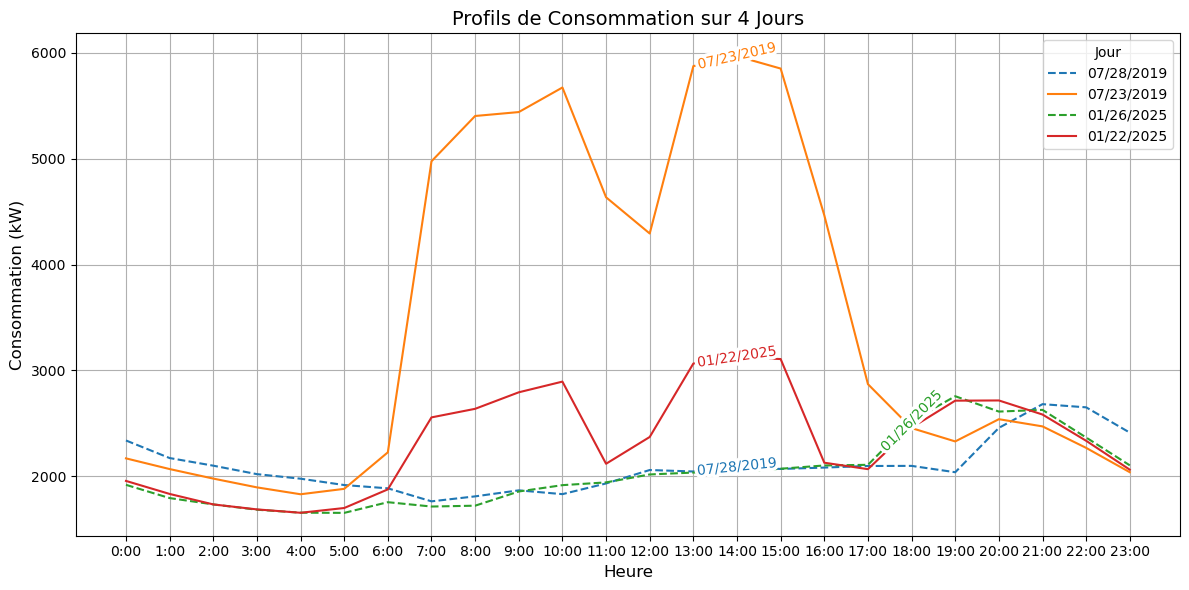

In [3]:
to_concat = [set_df_for_total_generation(i) for i in range(len(sheet_name_dict))]
df_total_generation = pd.concat(to_concat)
daily_plot_by_total_generation(df_total_generation)

---
### Étape 3 – Visualisation par feeder

Ensuite, les profils sont détaillés **par type de feeder** :  
- **Feeder industriel (PIC)** : charge plus stable et soutenue, surtout en semaine.  
- **Feeders résidentiels (Res1, Res2)** : pics marqués en soirée.  

Cette visualisation permet d’analyser séparément la contribution de chaque secteur et de comparer la structure de la demande entre semaine et week-end.

07/28/2019
07/23/2019
01/26/2025
01/22/2025


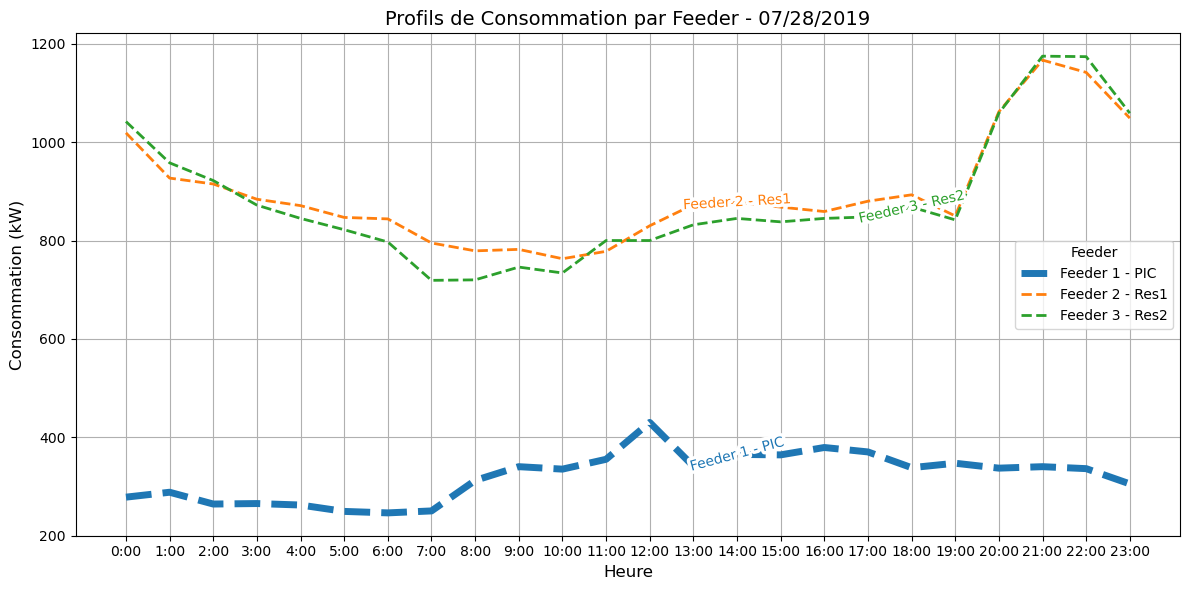

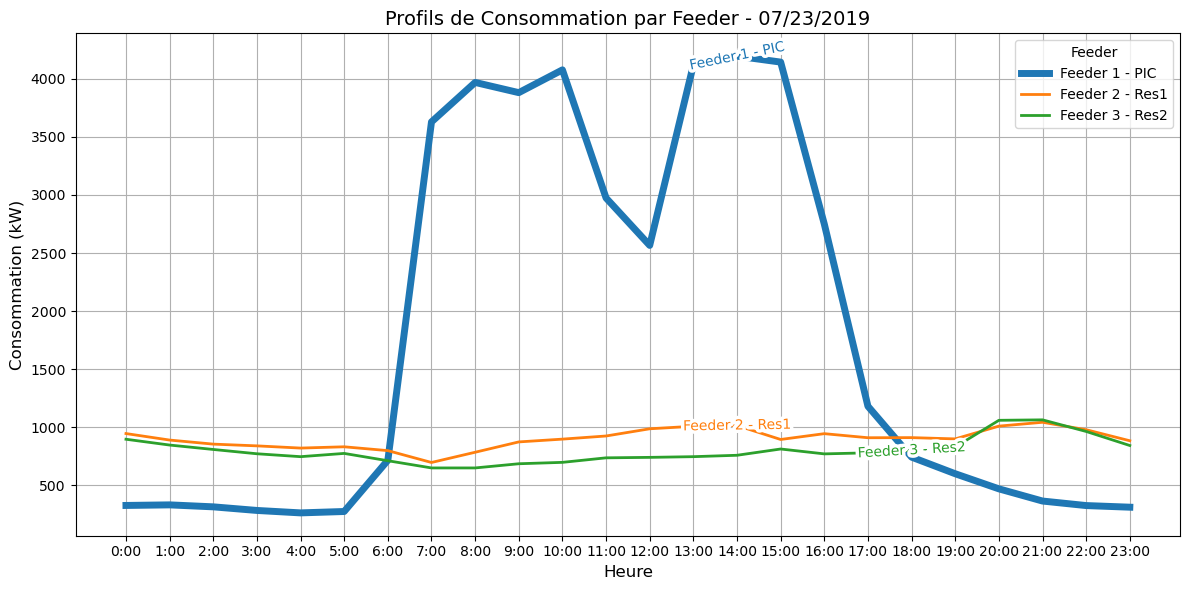

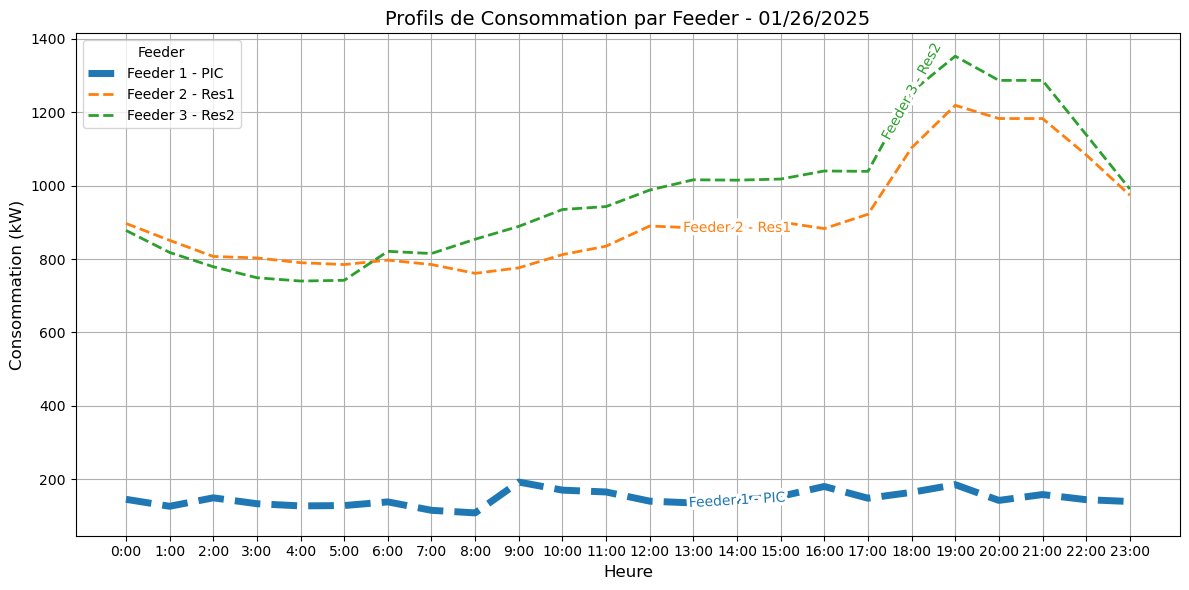

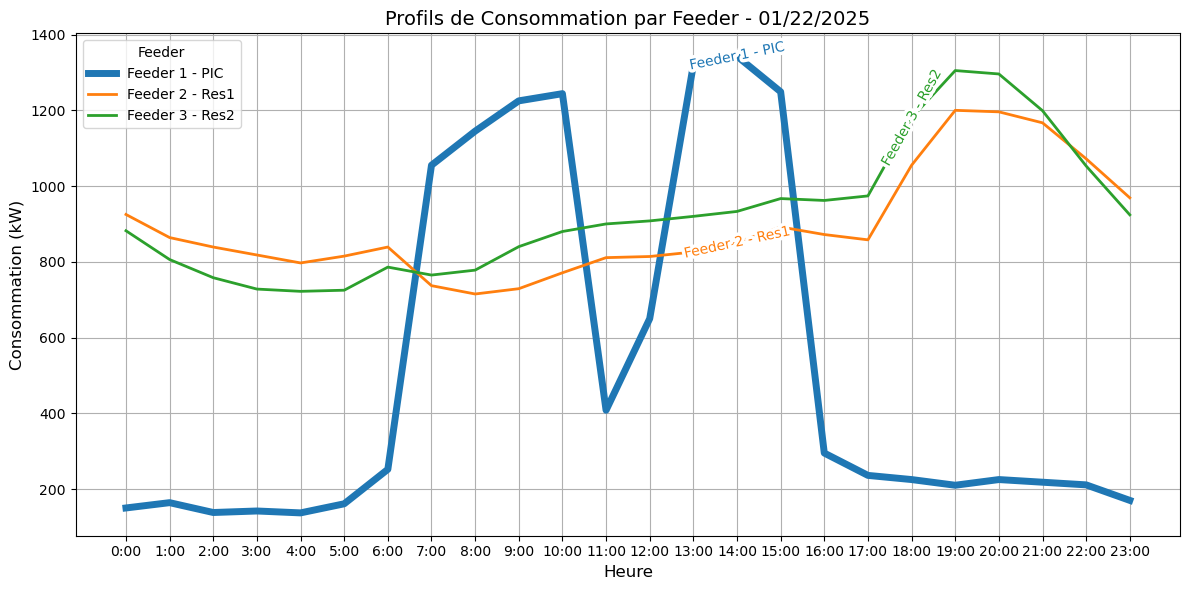

In [4]:
for i in range(len(sheet_name_dict)):
    daily_plot_by_feeder(set_df(i), sheet_name_dict[i]) 

---
### Étape 4 – Préparation des données pour l’analyse

Ce code permet d’extraire et de préparer deux jeux de données distincts :  
- **`week_sample`** : un profil de charge pour une journée de semaine (2025),  
- **`week_end_sample`** : un profil de charge pour une journée de week-end (2025).  

La fonction `set_df()` charge les données du fichier Excel et les transpose (`.T`) pour faciliter la lecture : les heures deviennent des lignes et les feeders des colonnes.  

Ensuite, la commande `reset_index()` remet les heures au bon format pour l’analyse, et `head()` affiche les premières lignes afin de vérifier que les données sont bien organisées.  


In [5]:
week_sample = set_df(3).T
week_end_sample = set_df(2).T
week_sample.reset_index()
week_sample.head()

feeders,Feeder 1 - PIC,Feeder 2 - Res1,Feeder 3 - Res2,Total Generation
Hour,,,,
0:00,150,925,882,1957
1:00,164,864,806,1834
2:00,138,839,758,1735
3:00,142,818,728,1688
4:00,137,797,722,1656


---
### Étape 5 – Génération de profils de charge synthétiques

<img src="images/diag.png" alt="Diagramme" width="400"/>

Ce bloc de code permet de **générer artificiellement des profils de consommation électrique** à partir des profils réels de semaine et de week-end identifiés plus tôt.  

- **Journée de semaine** : on applique des variations aléatoires réalistes sur chaque feeder (industriel/PIC, résidentiel 1, résidentiel 2) en tenant compte des heures creuses, des pics de consommation, et des fluctuations naturelles.  
- **Journée de week-end** : un profil spécifique est utilisé, avec une consommation industrielle réduite (moins d’activité) et une demande résidentielle dominante.  
- **Semaine complète** : on combine 5 jours de semaine et 2 jours de week-end pour créer un cycle hebdomadaire représentatif.  
- **Mois et année** : en répétant ce processus, on génère un jeu de données complet sur plusieurs mois (ou une année), reproduisant la variabilité journalière et saisonnière de la demande.  

L’objectif est de disposer de **séries temporelles réalistes** de consommation afin de tester différents scénarios d’intégration des énergies renouvelables et d’optimisation énergétique dans les réseaux isolés comme celui de Caracol.


In [6]:
np.random.seed(10)
def apply_variation(series, std_dev):
    return series.apply(lambda x: x * (1 + np.random.normal(0.0, std_dev)))

def apply_random_series(length, mean, std):
    return [np.random.normal(mean, std) for _ in range(length)]

In [7]:
import numpy as np
import pandas as pd

def generate_1_day_week_load(
    prev_day: pd.DataFrame,
    apply_variation,
    apply_random_series,
    variation_params=None
) -> pd.DataFrame:
    """
    Generate a synthetic daily load profile based on previous day's data.
    
    Parameters:
        prev_day (pd.DataFrame): Previous day's load profile.
        apply_variation (func): Function to apply small variations to time series.
        apply_random_series (func): Function to generate random series.
        variation_params (dict): Optional dict of parameters for random series generation.
    
    Returns:
        pd.DataFrame: Simulated current day load profile.
    """
    if variation_params is None:
        variation_params = {
            "PIC_morning": (4, 1100, 50),
            "PIC_afternoon": (3, 1500, 50),
            "PIC_evening": (7, 150, 25),
            "Res1_day": (10, 775, 10),
            "Res2_day": (10, 850, 10)
        }

    current_day = prev_day.copy()

    # --- PIC Feeder ---
    f1 = feeder_type[0]
    current_day.loc["0:00":"5:00", f1] = apply_variation(prev_day.loc["0:00":"5:00", f1], 0.01)
    current_day.loc["6:00", f1] = prev_day.loc["6:00", f1] * (1 + np.random.normal(0.0, 0.05))
    current_day.loc["7:00":"10:00", f1] = apply_random_series(*variation_params["PIC_morning"])
    current_day.loc["11:00", f1] = prev_day.loc["11:00", f1] * (1 + np.random.normal(0.1, 0.06))
    current_day.loc["12:00", f1] = prev_day.loc["12:00", f1] * (1 + np.random.normal(0.1, 0.06))
    current_day.loc["13:00":"15:00", f1] = apply_random_series(*variation_params["PIC_afternoon"])
    current_day.loc["16:00", f1] = prev_day.loc["16:00", f1] * (1 + np.random.normal(0.5, 0.03))
    current_day.loc["17:00":"23:00", f1] = apply_random_series(*variation_params["PIC_evening"])

    # --- Residential 1 ---
    f2 = feeder_type[1]
    current_day.loc["0:00":"6:00", f2] = apply_variation(prev_day.loc["0:00":"6:00", f2], 0.01)
    current_day.loc["7:00":"16:00", f2] = apply_random_series(*variation_params["Res1_day"])
    current_day.loc["17:00":"23:00", f2] = apply_variation(prev_day.loc["17:00":"23:00", f2], 0.01)

    # --- Residential 2 ---
    f3 = feeder_type[2]
    current_day.loc["0:00":"6:00", f3] = apply_variation(prev_day.loc["0:00":"6:00", f3], 0.01)
    current_day.loc["7:00":"16:00", f3] = apply_random_series(*variation_params["Res2_day"])
    current_day.loc["17:00":"23:00", f3] = apply_variation(prev_day.loc["17:00":"23:00", f3], 0.01)

    # --- Total Load ---
    f_total = feeder_type[-1]
    current_day[f_total] = current_day[f1] + current_day[f2] + current_day[f3]

    return current_day

def generate_1_day_weekend_load(
    prev_day: pd.DataFrame,
    apply_variation,
    apply_random_series
) -> pd.DataFrame:
    """
    Generate a synthetic weekend load profile based on previous day's data.

    Parameters:
        prev_day (pd.DataFrame): Previous day's load profile.
        apply_variation (func): Function to apply small variations to time series.
        apply_random_series (func): Function to generate random series.

    Returns:
        pd.DataFrame: Simulated weekend load profile.
    """
    current_day = prev_day.copy()

    # --- PIC Feeder (stable, low variance) ---
    f1 = feeder_type[0]
    current_day.loc["0:00":"23:00", f1] = apply_variation(prev_day.loc["0:00":"23:00", f1], 0.005)

    # --- Residential 1 ---
    f2 = feeder_type[1]
    current_day.loc["0:00":"6:00", f2] = apply_variation(prev_day.loc["0:00":"6:00", f2], 0.01)
    current_day.loc["7:00":"10:00", f2] = apply_random_series(4, 850, 20)
    current_day.loc["11:00":"18:00", f2] = apply_random_series(8, 950, 25)
    current_day.loc["19:00":"23:00", f2] = apply_variation(prev_day.loc["19:00":"23:00", f2], 0.015)

    # --- Residential 2 ---
    f3 = feeder_type[2]
    current_day.loc["0:00":"6:00", f3] = apply_variation(prev_day.loc["0:00":"6:00", f3], 0.01)
    current_day.loc["7:00":"10:00", f3] = apply_random_series(4, 900, 20)
    current_day.loc["11:00":"18:00", f3] = apply_random_series(8, 1000, 25)
    current_day.loc["19:00":"23:00", f3] = apply_variation(prev_day.loc["19:00":"23:00", f3], 0.015)

    # --- Total Load ---
    f_total = feeder_type[-1]
    current_day[f_total] = current_day[f1] + current_day[f2] + current_day[f3]

    return current_day

def generate_1_week_load(is_last_week=False, n_day=None):
    
    week_day_local = week_sample
    weekend_day_local = week_end_sample
    week_df = [week_day_local]
    for day in range(4):
        week_day_local = generate_1_day_week_load(week_sample, apply_variation, apply_random_series)
        week_df.append(week_day_local)
        if day == 3:
            week_df.append(weekend_day_local)
            weekend_day_local = generate_1_day_weekend_load(week_end_sample, apply_variation, apply_random_series)
            week_df.append(weekend_day_local)
    if is_last_week:
        for i in range(n_day-28):
            week_day_local = generate_1_day_week_load(week_sample, apply_variation, apply_random_series)
            week_df.append(week_day_local)
                          
    return (pd.concat(week_df), weekend_day_local, week_day_local)
    
def generate_by_month(n_month=1):
    n_day = 30
    week_list = list()
    week_sample_ = week_sample
    week_end_sample_ = week_end_sample
    def _change_n_day(current):
        if current == 30 or current==29:
            return 31
        return 30
    for month in range(n_month):
        n_day = _change_n_day(n_day)
        if month == 1:
            n_day = 29
        for week in range(math.ceil(n_day/7)):
            if week < 3:
                week_generated = generate_1_week_load()
                week_list.append(week_generated[0])
                week_sample_ = week_generated[2]
                week_end_sample_ = week_generated[1]
            elif week == 3:
                week_generated = generate_1_week_load(True if n_day > 28 else False, n_day)
                week_list.append(week_generated[0])
                week_sample_ = week_generated[2]
                week_end_sample_ = week_generated[1] if n_day > 29 else week_end_sample_          
    return pd.concat(week_list)

result = generate_by_month(12)
final_df = result.copy()
month_result = generate_by_month(1)
month_final_df = month_result.copy()
month_result.shape

(744, 4)

---
### Etape 6 : Visualisation des profils journaliers générés (un mois)

Dans cette étape, nous exploitons les profils horaires simulés pour tracer l’évolution de la consommation au cours d’un mois.  
Le code parcourt l’ensemble des jours du mois (24 heures par jour) et extrait les données correspondantes pour chaque journée.  
Ensuite, il affiche les courbes de la consommation totale (`Total Generation`) en fonction des heures de la journée.

Cette visualisation permet de comparer directement plusieurs journées du mois et d’observer les variations de la demande énergétique entre jours de semaine et week-ends.


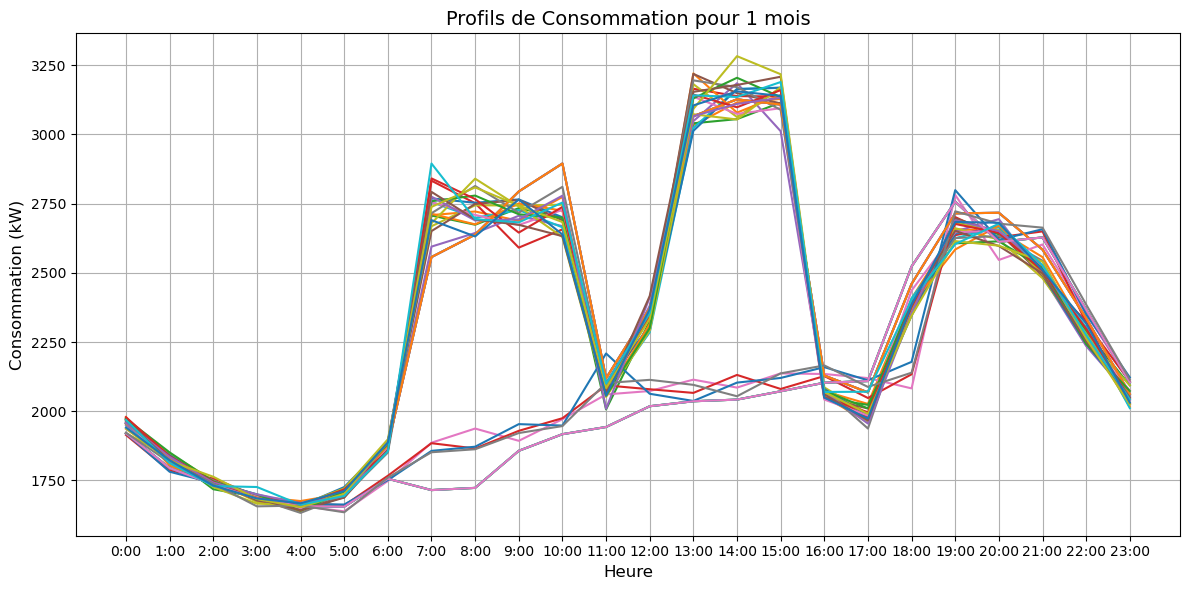

In [8]:
plt.figure(figsize=(12, 6))

def load_plot():

    for i in range(0, month_final_df.shape[0], 24):
        df = month_final_df.iloc[0+i:i+24]
        X = df_total_generation.columns
        plt.plot(X, df[feeder_type[-1]])
    plt.xlabel("Heure", fontsize=12)
    plt.ylabel("Consommation (kW)", fontsize=12)
    plt.title(f"Profils de Consommation pour 1 mois", fontsize=14)
    #plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

load_plot()

---
### Etape 7: Regroupement des données par mois

Maintenant que nous avons les profils de consommation pour chaque heure de l’année, nous allons les résumer par mois.  
Chaque ligne du tableau correspond à une heure précise, et en regroupant les données par mois, nous obtenons une vue globale de la consommation totale pour chaque mois.  

Cela permet de mieux voir les tendances de consommation et les variations entre les mois, sans se perdre dans les détails horaires.


In [9]:
# Step 1: Generate full datetime index (assuming year = 2025)
date_range = pd.date_range(start='2025-01-01', periods=8760, freq='h')
final_df.index = date_range
# Step 2: Group by month
monthly_df = final_df.resample('ME').sum()  # or .mean() 
monthly_df.head()

feeders,Feeder 1 - PIC,Feeder 2 - Res1,Feeder 3 - Res2,Total Generation
2025-01-31,319237.075409,664670.117175,690312.104062,1674219.296645
2025-02-28,281242.663715,600774.94187,624143.189411,1506160.794996
2025-03-31,319414.016418,664328.081287,689737.296596,1673479.394301
2025-04-30,307780.83784,643332.07467,667842.045449,1618954.957959
2025-05-31,319189.05105,664515.962484,690483.150639,1674188.164173


---
### Etape 8: Visualisation mensuelle des profils de consommation

Dans cette étape, nous représentons graphiquement la consommation totale par mois pour chaque ligne (feeder).  
Nous utilisons un graphique à barres empilées pour comparer facilement la contribution de chaque ligne à la consommation totale mensuelle.  

Cette visualisation permet de voir rapidement quels feeders consomment le plus chaque mois et d’identifier les variations de consommation au fil de l’année.


<Figure size 1200x600 with 0 Axes>

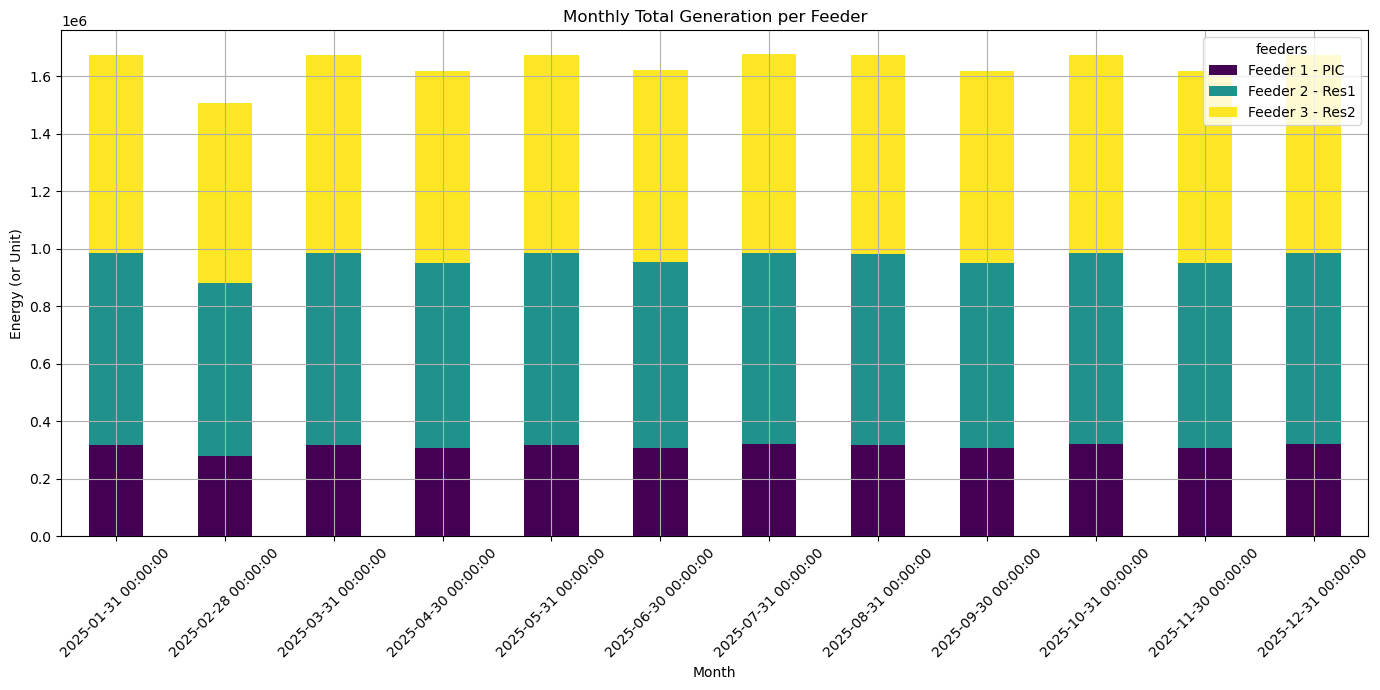

In [10]:
# Step 3: Plot
plt.figure(figsize=(12, 6))
monthly_df[[feeder_type[0], feeder_type[1], feeder_type[2]]].plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Monthly Total Generation per Feeder')
plt.ylabel('Energy (or Unit)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### Etape 9: Visualisation mensuelle de la consommation totale

Enfin, nous affichons la consommation totale mensuelle pour l’ensemble du réseau, en utilisant deux types de graphiques : ligne et barre.  
Cette étape permet de voir l’évolution globale de la consommation d’énergie sur l’année, sans se concentrer sur les feeders individuels.  

Les graphiques facilitent l’identification des mois où la consommation est particulièrement élevée ou faible, ce qui peut aider à planifier la production et la distribution d’énergie.


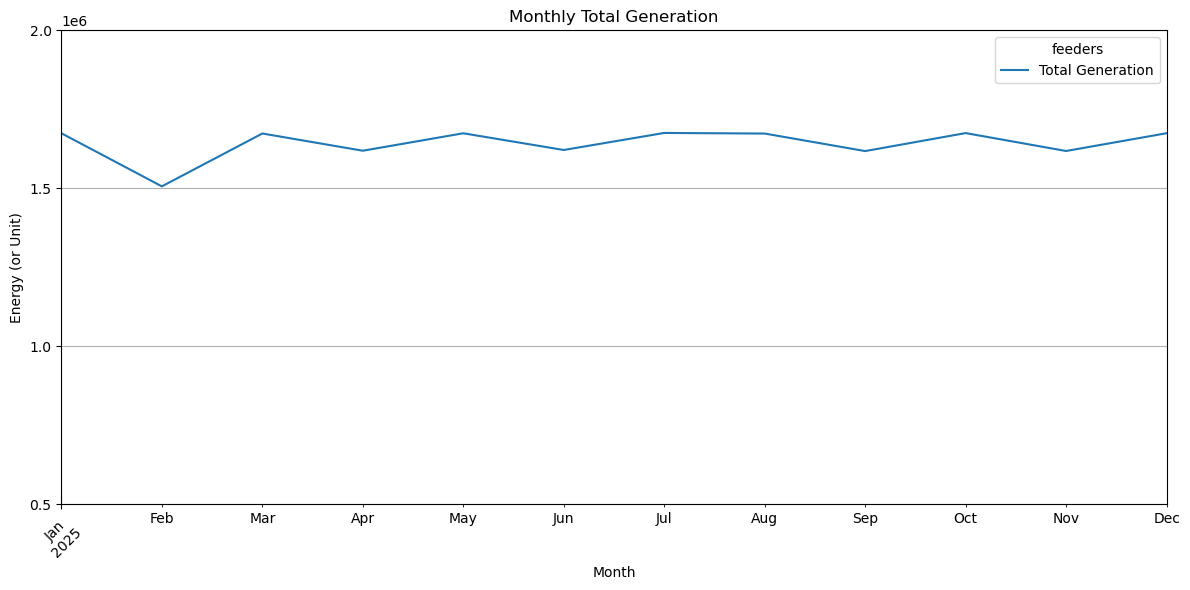

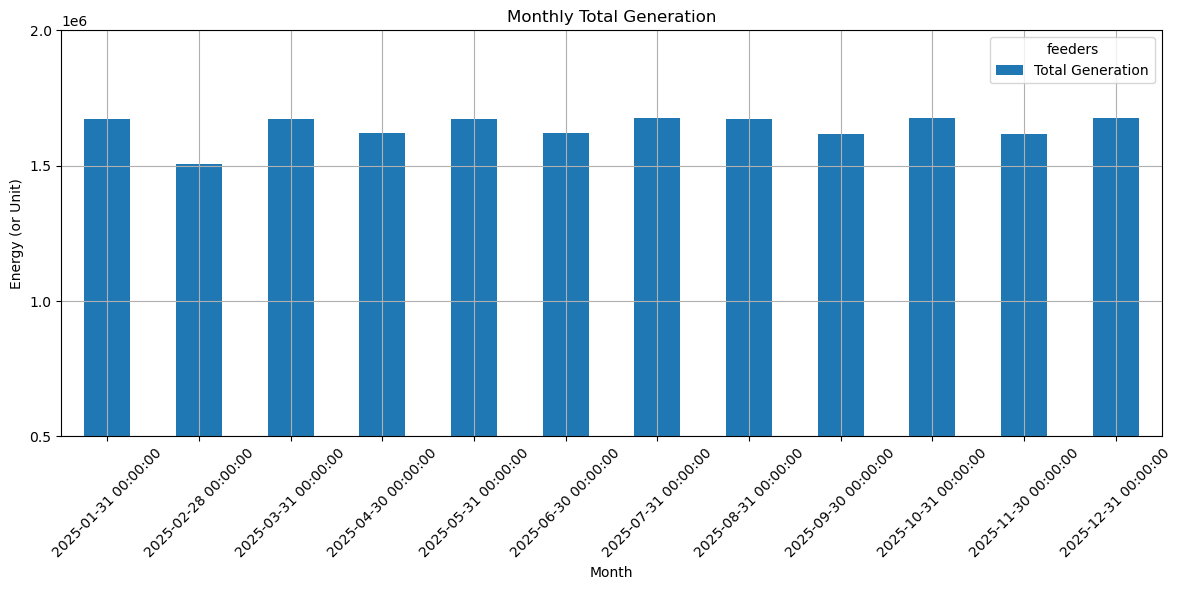

In [11]:
for _ in ["line", "bar"]:
    ax = monthly_df[[feeder_type[-1]]].plot(kind=_, figsize=(12, 6))
    plt.title('Monthly Total Generation')
    plt.ylabel('Energy (or Unit)')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.grid(True)
    # Set Y-axis ticks from 500,000 with step of 500,000
    y_min = 500_000
    y_max = monthly_df[[feeder_type[-1]]].max().max()
    y_max = int(np.ceil(y_max / 500_000) * 500_000)  # Round up to nearest 500,000
    plt.yticks(np.arange(y_min, y_max + 1, 500_000))
    plt.ylim(y_min, y_max)
    plt.tight_layout()
    plt.show()

In [12]:
final_df.describe()

feeders,Feeder 1 - PIC,Feeder 2 - Res1,Feeder 3 - Res2,Total Generation
count,8760,8760,8760,8760
unique,6498,6498,6503,6503
top,142,839,1287,1735
freq,144,96,96,96


In [13]:
# final_df.to_csv("./Data/load_profile.csv")